<a href="https://colab.research.google.com/github/keulreobeu/bigdate_student/blob/main/%EC%83%88%EC%8B%B9_%ED%97%AC%EC%8A%A4%EC%BC%80%EC%96%B4_%EC%84%9C%EB%B9%84%EC%8A%A4%EA%B8%B0%ED%9A%8D/%ED%8C%90%EB%8B%A4%EC%8A%A4_%EC%8B%AC%ED%99%94_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pandas 심화
`작성자: 최원칠 강사`   
`traveler4d@gmail.com`

[건강검진정보](https://www.data.go.kr/data/15007122/fileData.do)

[건강보험공단_진료건수](https://www.data.go.kr/data/15083145/fileData.do)

[기상청](https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36
)

[약가마스터_의약품주성분](https://www.data.go.kr/data/15067461/fileData.do)

[의약품안전사용서비스(DUR)](https://www.data.go.kr/data/15127983/fileData.do)


In [ ]:
import zipfile
import os

zip_filename = '판다스.zip'
extract_folder = '/content'

os.makedirs(extract_folder, exist_ok=True)

with zipfile.ZipFile(zip_filename, 'r') as zipf:
    zipf.extractall(extract_folder)

---
## 연속형과 비연속형
상황에 따라 연속형특징을 가지는 타입의 데이터와 비연속형 특징을 가지는 데이터의 활용형태가 다릅니다.  
pandas에서 제공하는 다양한 스킬을 활용하여 연속형과 비연속형 데이터를 좀더 다채롭게 다룰 수 있습니다.


### 연속형 변수의 이산, 범주화
연속형 데이터를 비연속형 데이터로 활용한다는 것은 연속적인 수치의 범위를 구간화 하여 범주로 활용하는 방식이 됩니다. 판다스는 `cut`,`qcut`함수를 제공하여 연속구간을 나누어 범주화 시킬수 있습니다.


- `cut()`: 값을 이산 간격으로 분류(등간격)   
- `qcut()`: 분위수 기반 이산화(등비율)  

In [ ]:
import pandas as pd
df_hc = pd.read_csv('/content/실습데이터/국민건강보험공단_건강검진정보(샘플).csv', index_col=0)
df_hc

,성별,연령대코드(5세단위),신장(5cm단위),수축기혈압,이완기혈압,체중(5kg단위),허리둘레,식전혈당(공복혈당),총콜레스테롤,혈색소,흡연상태,음주여부,지역명
가입자일련번호,,,,,,,,,,,,,
3746804,남자,55,165,108.0,65.0,55,75.1,169.0,NaN,15.3,흡연,마신다,대전
2522756,여자,35,165,107.0,64.0,65,79.0,79.0,NaN,14.6,비흡연,마시지 않는다,서울
3639084,남자,75,155,140.0,80.0,60,84.0,103.0,NaN,15.1,비흡연,마시지 않는다,전북
4018692,여자,55,155,121.0,66.0,60,83.0,86.0,NaN,13.0,비흡연,마시지 않는다,경기
2162974,여자,55,155,110.0,70.0,65,97.0,93.0,181.0,14.8,비흡연,마시지 않는다,부산
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604784,남자,45,170,145.0,90.0,70,84.1,99.0,187.0,15.0,흡연,마신다,인천
860313,남자,40,175,130.0,80.0,80,92.0,86.0,NaN,15.9,비흡연,마시지 않는다,충남
385333,여자,55,155,130.0,86.0,70,93.0,105.0,194.0,13.9,비흡연,마신다,충남


In [ ]:
df_hc.dtypes

,0
성별,object
연령대코드(5세단위),int64
신장(5cm단위),int64
수축기혈압,float64
이완기혈압,float64
체중(5kg단위),int64
허리둘레,float64
식전혈당(공복혈당),float64
총콜레스테롤,float64
혈색소,float64


#### *cut()* 을 활용한 연속형 데이터를 등간격으로 구간화
`cut(x,bins,labels)`
- `x` : 등간격을 진행할 배열
- `bins` : 등간격 구간 개수를 입력    
- `labels` : 각 간격의 라벨(표현 데이터)을 지정    

In [ ]:
# 등간격으로 구간화하기
arr = df_hc['수축기혈압'].to_numpy()
df_hc['수축기혈압_구분'] = pd.cut(arr, bins=3, labels = ['저','중','고'])
df_hc['수축기혈압_구분']

,수축기혈압_구분
가입자일련번호,
3746804,저
2522756,저
3639084,중
4018692,저
2162974,저
...,...
3604784,중
860313,중
385333,중


> `x` 인자를 배열로 받으므로 시리즈를 `to_numpy()` 함수로 배열화   
> 결과의 타입은 category 타입으로 생성

In [ ]:
# 등구간의 관측치 불균형 문제
df_hc['수축기혈압_구분'].value_counts()

,count
수축기혈압_구분,
저,18570
중,11209
고,69


> `value_counts()` : 고유항목의 개수를 출력

#### *qcut()* 을 활용한 연속형 데이터의 등비율 구간화

In [ ]:
# qcut()을 활용한 등비율 구간화
arr = df_hc['수축기혈압'].to_numpy()
df_hc['수축기혈압_구분'] = pd.qcut(arr, q=3, labels=['저','중','고'])
df_hc['수축기혈압_구분'].value_counts()

,count
수축기혈압_구분,
중,10986
저,10399
고,8463


> 결과의 타입은 `cut`과 동일하게 category 타입으로 생성     
> 백분율로 구간을 나누므로 관측치 불균형 문제가 없음     

#### 명확한 값을 지정하여 구간화

In [ ]:
# cut() 지정 구간화
cg = [0, 90, 140, 1000]
labels = ['저혈압', '정상', '고혈압']
df_hc['수축기혈압_구분'] = pd.cut(df_hc['수축기혈압'], bins=cg, labels = labels)
df_hc['수축기혈압_구분'].value_counts()

,count
수축기혈압_구분,
정상,26533
고혈압,3081
저혈압,234


### 비연속형 데이터의 변환
비연속형을 연속형을 바꾸는 경우는 대게 머신러닝등의 모델에서 범주형 데이터를 입력할때 입니다. 머신러닝 모델은 수치형 데이터만 인식을 하기에 문자형식으로 나타난 비연속형 데이터는 수치형의 데이터로 변환하여야 합니다.

- `factorize()`: 비연속 데이터를 수치화(순서 인코딩)    
- `get_dummies()`: 비연속 데이터를 더미 변수로 생성

#### *factorize()* 을 활용한 비연속형 데이터를 순서값으로 인코딩

In [ ]:
import pandas as pd
df_hc = pd.read_csv('/content/실습데이터/국민건강보험공단_건강검진정보(샘플).csv', index_col=0)
df_hc

,성별,연령대코드(5세단위),신장(5cm단위),수축기혈압,이완기혈압,체중(5kg단위),허리둘레,식전혈당(공복혈당),총콜레스테롤,혈색소,흡연상태,음주여부,지역명
가입자일련번호,,,,,,,,,,,,,
3746804,남자,55,165,108.0,65.0,55,75.1,169.0,NaN,15.3,흡연,마신다,대전
2522756,여자,35,165,107.0,64.0,65,79.0,79.0,NaN,14.6,비흡연,마시지 않는다,서울
3639084,남자,75,155,140.0,80.0,60,84.0,103.0,NaN,15.1,비흡연,마시지 않는다,전북
4018692,여자,55,155,121.0,66.0,60,83.0,86.0,NaN,13.0,비흡연,마시지 않는다,경기
2162974,여자,55,155,110.0,70.0,65,97.0,93.0,181.0,14.8,비흡연,마시지 않는다,부산
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604784,남자,45,170,145.0,90.0,70,84.1,99.0,187.0,15.0,흡연,마신다,인천
860313,남자,40,175,130.0,80.0,80,92.0,86.0,NaN,15.9,비흡연,마시지 않는다,충남
385333,여자,55,155,130.0,86.0,70,93.0,105.0,194.0,13.9,비흡연,마신다,충남


In [ ]:
# factorize()는 (인코딩값, 인덱스목록)의 튜플을 반환
enc, index = pd.factorize(df_hc['흡연상태'])
print(enc)
print(index)

[0 1 1 ... 1 1 0]
Index(['흡연', '비흡연', '금연'], dtype='object')


In [ ]:
df_hc['흡연상태'] = pd.factorize(df_hc['흡연상태'])[0]
df_hc['흡연상태']

,흡연상태
가입자일련번호,
3746804,0
2522756,1
3639084,1
4018692,1
2162974,1
...,...
3604784,0
860313,1
385333,1


> 결과 데이터 타입은 int64

#### *get_dummies()* 을 활용한 비연속형 데이터 bool 값으로 인코딩 (원-핫 인코딩 유사)
- 관측치가 가지고 있는 범주는 True 나머지 범주는 False 표기

In [ ]:
# get_dummies() 활용
df_hc = pd.read_csv('/content/실습데이터/국민건강보험공단_건강검진정보(샘플).csv', index_col=0)
dum = pd.get_dummies(df_hc['흡연상태'])
dum

,금연,비흡연,흡연
가입자일련번호,,,
3746804,False,False,True
2522756,False,True,False
3639084,False,True,False
4018692,False,True,False
2162974,False,True,False
...,...,...,...
3604784,False,False,True
860313,False,True,False
385333,False,True,False


In [ ]:
# 0 또는 1로 표기
dum = pd.get_dummies(df_hc['흡연상태'], dtype='int')
dum

,금연,비흡연,흡연
가입자일련번호,,,
3746804,0,0,1
2522756,0,1,0
3639084,0,1,0
4018692,0,1,0
2162974,0,1,0
...,...,...,...
3604784,0,0,1
860313,0,1,0
385333,0,1,0


> **one-hot 인코딩** : 관측치가 가지고 있는 범주는 1 나머지 범주는 0 표기

In [ ]:
# concat또는 merge(join)로 결합
pd.concat([df_hc,dum], axis = 1)

,성별,연령대코드(5세단위),신장(5cm단위),수축기혈압,이완기혈압,체중(5kg단위),허리둘레,식전혈당(공복혈당),총콜레스테롤,혈색소,흡연상태,음주여부,지역명,금연,비흡연,흡연
가입자일련번호,,,,,,,,,,,,,,,,
3746804,남자,55,165,108.0,65.0,55,75.1,169.0,NaN,15.3,흡연,마신다,대전,0,0,1
2522756,여자,35,165,107.0,64.0,65,79.0,79.0,NaN,14.6,비흡연,마시지 않는다,서울,0,1,0
3639084,남자,75,155,140.0,80.0,60,84.0,103.0,NaN,15.1,비흡연,마시지 않는다,전북,0,1,0
4018692,여자,55,155,121.0,66.0,60,83.0,86.0,NaN,13.0,비흡연,마시지 않는다,경기,0,1,0
2162974,여자,55,155,110.0,70.0,65,97.0,93.0,181.0,14.8,비흡연,마시지 않는다,부산,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604784,남자,45,170,145.0,90.0,70,84.1,99.0,187.0,15.0,흡연,마신다,인천,0,0,1
860313,남자,40,175,130.0,80.0,80,92.0,86.0,NaN,15.9,비흡연,마시지 않는다,충남,0,1,0
385333,여자,55,155,130.0,86.0,70,93.0,105.0,194.0,13.9,비흡연,마신다,충남,0,1,0


---
## 문자열과 날짜형
테이블데이터에는 문자열(str) 또는 날짜형(datetime) 타입의 데이터가 포함되는 경우가 많이 있습니다.   
pandas는 문자열과 날짜형에 대한 다양한 분석 스킬 기능을 제공하기에 이를 활용하면 좀더 고차원적인 분석이 가능해집니다.

### 문자열 다루기(str)
문자열 시리즈에서 `.str` 접근자를 활용하면 문자열을 제어하는 다양한 함수를 사용하여 복잡한 문제를 해결할 수 있습니다.

**대표 함수**
- `str.contains()` : 문자열이 포함된 관측치를 인덱싱
- `str.strip()` : 맨앞 또는 맨뒤의 특정 문자열을 제거
- `str.replace()` : 특정 문자열을 다른 문자열로 치환
- `str.split()` : 특정 문자열을 기준으로 문자열을 분리

In [ ]:
import pandas as pd
df_md = pd.read_csv('./data/약가마스터_의약품주성분.csv')
df_md.dropna(subset='제형', inplace=True)
df_md.drop_duplicates('일반명코드', inplace=True)
df_md.set_index('일반명코드', inplace=True)
df_md

,제형구분코드,제형,일반명,분류번호,투여경로,함량,단위
일반명코드,,,,,,,
100101AGN,(GN),"과립제,세립",상황균사체엑스,421번,내복,1.1000,g
100101ALQ,(LQ),액제,상황균사체엑스,421번,내복,1.1000,g
100101APD,(PD),산제,phellinus linteus mycelliun ext.,421번,내복,1.1000,g
100102ACH,(CH),경질캡슐제,phellinus linteus mycelliun ext.,421번,내복,0.5500,g
100102ALQ,(LQ),액제,phellinus linteus mycelliun ext.,421번,내복,1.1000,g(55mg/mL)
...,...,...,...,...,...,...,...
E85600ATB,(TB),"정제,저작정",ascorbic acid,319번,내복,0.1000,g
E85700ATB,(TB),"정제,저작정",anhydrous dibasic calcium phosphate,319번,내복,0.1695,g
E85800ACS,(CS),연질캡슐제,anhydrous caffeine,141번,내복,25.0000,mg


#### *contains()* 함수를 활용하여 문자열 포함 관측치 인덱싱

In [ ]:
# contains() 활용
contains = df_md['제형'].str.contains('캡슐')
df_md[contains]

,제형구분코드,제형,일반명,분류번호,투여경로,함량,단위
일반명코드,,,,,,,
100102ACH,(CH),경질캡슐제,phellinus linteus mycelliun ext.,421번,내복,0.55,g
100301ACH,(CH),경질캡슐제,magnesium trihydrate salt of chenodesoxycholic...,236번,내복,0.25,g
100701ACH,(CH),경질캡슐제,acebrophylline,229번,내복,0.10,g
100801ACH,(CH),경질캡슐제,acebutolol HCl,219번,내복,222.00,mg
100901ACH,(CH),경질캡슐제,aceclofenac,114번,내복,0.10,g
...,...,...,...,...,...,...,...
E84900ACS,(CS),연질캡슐제,ascorbic acid,316번,내복,60.00,mg
E85200ACS,(CS),연질캡슐제,ascorbic acid,316번,내복,60.00,mg
E85300ACS,(CS),연질캡슐제,anhydrous caffeine,141번,내복,20.00,mg


> `contains()` 의 결과는 bool 시리즈이므로 바로 인덱싱 가능

#### *replace()* 함수를 활용하여 문자열 부분 변환
- 첫번째 인자(pat)에 입력된 문자열을 두번째 인자(repl)에 입력된 문자열로 변환

In [ ]:
df_md['분류번호'] = df_md['분류번호'].str.replace('번','').astype('int64')
df_md

,제형구분코드,제형,일반명,분류번호,투여경로,함량,단위
일반명코드,,,,,,,
100101AGN,(GN),"과립제,세립",상황균사체엑스,421,내복,1.1000,g
100101ALQ,(LQ),액제,상황균사체엑스,421,내복,1.1000,g
100101APD,(PD),산제,phellinus linteus mycelliun ext.,421,내복,1.1000,g
100102ACH,(CH),경질캡슐제,phellinus linteus mycelliun ext.,421,내복,0.5500,g
100102ALQ,(LQ),액제,phellinus linteus mycelliun ext.,421,내복,1.1000,g(55mg/mL)
...,...,...,...,...,...,...,...
E85600ATB,(TB),"정제,저작정",ascorbic acid,319,내복,0.1000,g
E85700ATB,(TB),"정제,저작정",anhydrous dibasic calcium phosphate,319,내복,0.1695,g
E85800ACS,(CS),연질캡슐제,anhydrous caffeine,141,내복,25.0000,mg


> repl 문자열을 `''` 문자열로 입력시 기존 문자열에서 pat 문자열이 삭제

#### *strip()* 함수를 활용하여 문자열 앞뒤 제거
- 입력된 문자열(포함) 과 공백이 문자열 맨앞뒤에 존재시 제거
- `lstrip()` , `rstrip()` 으로 앞 또는 뒤에만 해당하는 문자열 제거 가능

In [ ]:
df_md['제형구분코드'] = df_md['제형구분코드'].str.strip('()')
df_md

,제형구분코드,제형,일반명,분류번호,투여경로,함량,단위
일반명코드,,,,,,,
100101AGN,GN,"과립제,세립",상황균사체엑스,421,내복,1.1000,g
100101ALQ,LQ,액제,상황균사체엑스,421,내복,1.1000,g
100101APD,PD,산제,phellinus linteus mycelliun ext.,421,내복,1.1000,g
100102ACH,CH,경질캡슐제,phellinus linteus mycelliun ext.,421,내복,0.5500,g
100102ALQ,LQ,액제,phellinus linteus mycelliun ext.,421,내복,1.1000,g(55mg/mL)
...,...,...,...,...,...,...,...
E85600ATB,TB,"정제,저작정",ascorbic acid,319,내복,0.1000,g
E85700ATB,TB,"정제,저작정",anhydrous dibasic calcium phosphate,319,내복,0.1695,g
E85800ACS,CS,연질캡슐제,anhydrous caffeine,141,내복,25.0000,mg


> 인자에 문자열을 입력 안할시(기본값) 공백만 삭제

#### *split()* 함수를 활용하여 문자열 분할 하기
- 입력된 문자열을 기준을 문자열을 잘라 리스트로 구성
- `expand` 인자가 `True`인경우 분할된 문자열을 각각 컬럼으로 분할

In [ ]:
# , 를 기준으로 분할
split = df_md['제형'].str.split(',')
split

,제형
일반명코드,
100101AGN,"[과립제, 세립]"
100101ALQ,[액제]
100101APD,[산제]
100102ACH,[경질캡슐제]
100102ALQ,[액제]
...,...
E85600ATB,"[정제, 저작정]"
E85700ATB,"[정제, 저작정]"
E85800ACS,[연질캡슐제]


In [ ]:
# 각 관측치에서 리스트의 인덱싱
split.str[0]

,제형
일반명코드,
100101AGN,과립제
100101ALQ,액제
100101APD,산제
100102ACH,경질캡슐제
100102ALQ,액제
...,...
E85600ATB,정제
E85700ATB,정제
E85800ACS,연질캡슐제


In [ ]:
# 분할 확장
expand = df_md['제형'].str.split(',', expand=True)
expand

,0,1,2
일반명코드,,,
100101AGN,과립제,세립,None
100101ALQ,액제,None,None
100101APD,산제,None,None
100102ACH,경질캡슐제,None,None
100102ALQ,액제,None,None
...,...,...,...
E85600ATB,정제,저작정,None
E85700ATB,정제,저작정,None
E85800ACS,연질캡슐제,None,None


> 목록의 개수가 가장 많은 경우를 기준으로 컬럼을 형성, 빈 인덱스는 결측치

추가로 stack() 함수를 활용하여 확장된 항목을 하나의 열로 병합 가능

- `stack()` : 각 컬럼을 분할하고 수직으로 연결하여 하나의 시리즈로 구성

In [ ]:
# 목록의 고유항목 파악하기
cate = expand.stack()
cate

일반명코드       
100101AGN  0      과립제
           1       세립
100101ALQ  0       액제
100101APD  0       산제
100102ACH  0    경질캡슐제
                ...  
E85700ATB  1      저작정
E85800ACS  0    연질캡슐제
E85900ATB  0       정제
           1      저작정
E86000ACS  0    연질캡슐제
Length: 28339, dtype: object

> 기존 관측치마다 여러 제형을 가지므로 멀티인덱스로 구성됨

In [ ]:
# 제형 별로 관측치 재설정
df_ct = cate.reset_index().rename({0:'제형'}, axis=1)
df_ct

,일반명코드,level_1,제형
0,100101AGN,0,과립제
1,100101AGN,1,세립
2,100101ALQ,0,액제
3,100101APD,0,산제
4,100102ACH,0,경질캡슐제
...,...,...,...
28334,E85700ATB,1,저작정
28335,E85800ACS,0,연질캡슐제
28336,E85900ATB,0,정제
28337,E85900ATB,1,저작정


> 해당 데이터프레임을 merge하여 제형 그룹별 분석에 활용 가능


### 날짜형 다루기(dt)
날짜형 시리즈에서 `.dt` 접근자를 활용하면 날짜형 데이터를 제어하는 다양한 함수 사용가능
> `pd.date_range()`: 연속적인 날짜를 반환   
> `pd.to_datetime()` : 원하는 포맷에서 날짜형 생성     
> `dt.sec~year`: 선택한 날짜(시간) 개념으로 치환    
> `dt.strftime()` : 원하는 날짜 포맷의 문자열로 변경

#### *date_range()* 를 활용하여 연속적인 datetime64 데이터를 가지는 DatetimeIndex 생성

In [ ]:
import pandas as pd

date = pd.date_range("2023-01-01 09:10:12", periods=4)
df = pd.DataFrame({'CATE' : ['A', 'B', 'C', 'D'],
                   'NUM': [7,6,5,8],
                   'FNUM': [1.5, 2.1, 3.4, 6.2],
                   'BOOL': [True, False, False, True],
                   'DATE' : date})
df

,CATE,NUM,FNUM,BOOL,DATE
0,A,7,1.5,True,2023-01-01 09:10:12
1,B,6,2.1,False,2023-01-02 09:10:12
2,C,5,3.4,False,2023-01-03 09:10:12
3,D,8,6.2,True,2023-01-04 09:10:12


> `periods` : 생성될 날짜 개수

In [ ]:
# 기간 단위 설정
pd.date_range("20230101 09:10:12", periods=4, freq='M')

pd.date_range("20230101 09:10:12", periods=4, freq='Y')

pd.date_range("20230101 09:10:12", periods=4, freq='3M')

pd.date_range("20230101 09:10:12", periods=4, freq='H')


/tmp/ipython-input-1080255780.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range("20230101 09:10:12", periods=4, freq='M')
/tmp/ipython-input-1080255780.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  pd.date_range("20230101 09:10:12", periods=4, freq='Y')
/tmp/ipython-input-1080255780.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range("20230101 09:10:12", periods=4, freq='3M')
/tmp/ipython-input-1080255780.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range("20230101 09:10:12", periods=4, freq='H')


DatetimeIndex(['2023-01-01 09:10:12', '2023-01-01 10:10:12',
               '2023-01-01 11:10:12', '2023-01-01 12:10:12'],
              dtype='datetime64[ns]', freq='h')

> `freq` : 날짜간 사이의 기간(D=일, M=월, Y=년, H=시간, T=분, S=초)     

In [ ]:
# 범위를 직접 지정
pd.date_range(start='2023-01-01', end='2023-02-01', freq='D')

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01'],
              dtype='datetime64[ns]', freq='D')

> `start`, `end` : freq에 따른 start ~ end 사이의 연속적인 날짜 생성   

#### *to_datetime()* 를 활용하여 원하는 포맷에서 날짜형 변환
[날짜 포맷](https://docs.python.org/ko/3/library/datetime.html#strftime-and-strptime-format-codes): 날짜를 문자열로 표현하기 위한 표준 기호

In [ ]:
df = pd.DataFrame({'CATE' : ['A', 'B', 'C', 'D'],
                   'NUM': [7,6,5,8],
                   'FNUM': [1.5, 2.1, 3.4, 6.2],
                   'BOOL': [True, False, False, True],
                   'DATE' : [20210101,20210102,20210103,20210104]})
df

,CATE,NUM,FNUM,BOOL,DATE
0,A,7,1.5,True,20210101
1,B,6,2.1,False,20210102
2,C,5,3.4,False,20210103
3,D,8,6.2,True,20210104


In [ ]:
df['DATE'].astype('datetime64[ns]')

,DATE
0,1970-01-01 00:00:00.020210101
1,1970-01-01 00:00:00.020210102
2,1970-01-01 00:00:00.020210103
3,1970-01-01 00:00:00.020210104


> astype은 `년도-월-일` 과 같은 기본 포맷만 지원

In [ ]:
pd.to_datetime(df['DATE'], format='%Y%m%d')

,DATE
0,2021-01-01
1,2021-01-02
2,2021-01-03
3,2021-01-04


> to_datetime()은 직접 포맷을 지정하므로 모든 포맷을 지원

In [ ]:
df = pd.DataFrame({'CATE' : ['A', 'B', 'C', 'D'],
                   'NUM': [7,6,5,8],
                   'FNUM': [1.5, 2.1, 3.4, 6.2],
                   'BOOL': [True, False, False, True],
                   'DATE' : ['2021.01.01','2021.01.02','2021.01.03',
                             '2021.01.04']})
pd.to_datetime(df['DATE'], format='%Y.%m.%d')

,DATE
0,2021-01-01
1,2021-01-02
2,2021-01-03
3,2021-01-04


#### *.dt.strftime()* 를 활용하여 원하는 날짜 포맷의 문자열로 치환   


In [ ]:
df_w = pd.read_csv('./data/기상청_서울.csv', encoding = 'cp949')
df_w['일시'] = df_w['일시'].astype('datetime64[ns]')
df_w

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%)
0,108,서울,2014-01-01,4.0,0.3,7.9,0.0,3.7,51.3
1,108,서울,2014-01-02,1.5,-1.3,6.2,NaN,2.0,35.4
2,108,서울,2014-01-03,2.3,-1.1,7.3,NaN,2.5,54.4
3,108,서울,2014-01-04,-0.1,-3.7,5.6,NaN,2.4,47.1
4,108,서울,2014-01-05,-0.8,-4.3,3.8,NaN,1.9,48.4
...,...,...,...,...,...,...,...,...,...
3647,108,서울,2023-12-27,1.5,-2.8,6.8,NaN,1.4,76.6
3648,108,서울,2023-12-28,1.2,-1.7,4.4,NaN,1.6,69.5
3649,108,서울,2023-12-29,1.3,-1.5,4.6,NaN,1.7,71.0
3650,108,서울,2023-12-30,0.6,-0.9,2.1,13.1,2.6,92.0


In [ ]:
# strftime() 활용하여 문자열 치환
df_w['일시'].dt.strftime("%Y/%m/%d")

,일시
0,2014/01/01
1,2014/01/02
2,2014/01/03
3,2014/01/04
4,2014/01/05
...,...
3647,2023/12/27
3648,2023/12/28
3649,2023/12/29
3650,2023/12/30


> strftime() 결과는 문자열(object) 로 반환됨

In [ ]:
# 포맷을 활용하여 다양한 작업 가능
df_w['년도'] = df_w['일시'].dt.strftime("%Y년")
df_w

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),년도
0,108,서울,2014-01-01,4.0,0.3,7.9,0.0,3.7,51.3,2014년
1,108,서울,2014-01-02,1.5,-1.3,6.2,NaN,2.0,35.4,2014년
2,108,서울,2014-01-03,2.3,-1.1,7.3,NaN,2.5,54.4,2014년
3,108,서울,2014-01-04,-0.1,-3.7,5.6,NaN,2.4,47.1,2014년
4,108,서울,2014-01-05,-0.8,-4.3,3.8,NaN,1.9,48.4,2014년
...,...,...,...,...,...,...,...,...,...,...
3647,108,서울,2023-12-27,1.5,-2.8,6.8,NaN,1.4,76.6,2023년
3648,108,서울,2023-12-28,1.2,-1.7,4.4,NaN,1.6,69.5,2023년
3649,108,서울,2023-12-29,1.3,-1.5,4.6,NaN,1.7,71.0,2023년
3650,108,서울,2023-12-30,0.6,-0.9,2.1,13.1,2.6,92.0,2023년


#### *.dt.시간변수* 를 활용하여 원하는 시간의 데이터를 인덱싱
- 시간변수 : day, month, year, weekday, hour, minute, second, date
- weekday는 0 ~ 6(월 ~ 일)으로 표현

In [ ]:
df_w['일시'].dt.day

,일시
0,1
1,2
2,3
3,4
4,5
...,...
3647,27
3648,28
3649,29
3650,30


In [ ]:
df_w[df_w['일시'].dt.day == 1] # 일자가 1일인 경우
df_w[df_w['일시'].dt.month == 6] # 월이 6월인 경우
df_w[df_w['일시'].dt.weekday == 0] # 월요일인 경우

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),년도
5,108,서울,2014-01-06,0.8,-3.7,6.4,NaN,1.6,50.4,2014년
12,108,서울,2014-01-13,-6.2,-10.5,-1.6,NaN,2.9,26.0,2014년
19,108,서울,2014-01-20,-1.5,-4.2,1.9,5.3,3.2,83.3,2014년
26,108,서울,2014-01-27,0.2,-5.4,6.0,NaN,2.6,48.0,2014년
33,108,서울,2014-02-03,-3.5,-8.2,2.8,NaN,4.3,38.5,2014년
...,...,...,...,...,...,...,...,...,...,...
3617,108,서울,2023-11-27,6.2,4.4,9.3,3.6,2.4,82.9,2023년
3624,108,서울,2023-12-04,2.7,-3.0,9.4,NaN,1.6,59.5,2023년
3631,108,서울,2023-12-11,8.9,5.0,12.3,11.4,NaN,82.9,2023년
3638,108,서울,2023-12-18,-7.7,-12.2,-3.6,NaN,2.2,45.1,2023년



## 기능의 반복적 적용

pandas에서 제공되는 다양한 함수는 데이터에 기본적인 분석 스킬로서 유용하게 사용할 수 있습니다. 하지만, 제공되는 함수만으로 처리하게는 제한적인 부분이 존재 합니다.

이런경우, 제공되는 함수가 아닌 직접적으로 구성한 기능을 DataFrame또는 Series에 반복적 적용하여 더욱 자유로운 분석을 진행해주어야 합니다.


### for문을 활용한 반복 적용
기본적으로 DataFrame를 for문의 이터러블로 사용시 컬럼라벨이 출력됩니다.
하지만, 다양한 함수나 연산자를 활용하여 원하는 이터러블을 구성하여 for문을 활용할 수 있습니다.

**활용 방식**

- `DataFrame` : 컬럼이름  
- `.iloc`: 순서에 따른 row 시리즈   
- `items()`: (컬럼이름, 해당컬럼 시리즈)   
- `iterrows()`: (인덱스, 해당로우 시리즈)


In [ ]:
import pandas as pd
df_hc = pd.read_csv('/content/실습데이터/국민건강보험공단_건강검진정보(샘플).csv', index_col=0).iloc[:5,:5]
df_hc

,성별,연령대코드(5세단위),신장(5cm단위),수축기혈압,이완기혈압
가입자일련번호,,,,,
3746804,남자,55,165,108.0,65.0
2522756,여자,35,165,107.0,64.0
3639084,남자,75,155,140.0,80.0
4018692,여자,55,155,121.0,66.0
2162974,여자,55,155,110.0,70.0


In [ ]:
# DataFrame 사용
for i in df_hc:
    print(i)

성별
연령대코드(5세단위)
신장(5cm단위)
수축기혈압
이완기혈압


> 컬럼 이름만 순서대로 출력

In [ ]:
# items() 사용
for col, ser in df_hc.items():
    print('col: ', col)
    print('ser: ', ser)
    print('-'*20)

col:  성별
ser:  가입자일련번호
3746804    남자
2522756    여자
3639084    남자
4018692    여자
2162974    여자
Name: 성별, dtype: object
--------------------
col:  연령대코드(5세단위)
ser:  가입자일련번호
3746804    55
2522756    35
3639084    75
4018692    55
2162974    55
Name: 연령대코드(5세단위), dtype: int64
--------------------
col:  신장(5cm단위)
ser:  가입자일련번호
3746804    165
2522756    165
3639084    155
4018692    155
2162974    155
Name: 신장(5cm단위), dtype: int64
--------------------
col:  수축기혈압
ser:  가입자일련번호
3746804    108.0
2522756    107.0
3639084    140.0
4018692    121.0
2162974    110.0
Name: 수축기혈압, dtype: float64
--------------------
col:  이완기혈압
ser:  가입자일련번호
3746804    65.0
2522756    64.0
3639084    80.0
4018692    66.0
2162974    70.0
Name: 이완기혈압, dtype: float64
--------------------


> 컬럼 이름이 순서대로 출력되며, 해당 컬럼의 모든 관측치를 시리즈로 추가 출력

In [ ]:
# iloc 사용
for i in df_hc.iloc:
    print(i)

성별                남자
연령대코드(5세단위)       55
신장(5cm단위)        165
수축기혈압          108.0
이완기혈압           65.0
Name: 3746804, dtype: object
성별                여자
연령대코드(5세단위)       35
신장(5cm단위)        165
수축기혈압          107.0
이완기혈압           64.0
Name: 2522756, dtype: object
성별                남자
연령대코드(5세단위)       75
신장(5cm단위)        155
수축기혈압          140.0
이완기혈압           80.0
Name: 3639084, dtype: object
성별                여자
연령대코드(5세단위)       55
신장(5cm단위)        155
수축기혈압          121.0
이완기혈압           66.0
Name: 4018692, dtype: object
성별                여자
연령대코드(5세단위)       55
신장(5cm단위)        155
수축기혈압          110.0
이완기혈압           70.0
Name: 2162974, dtype: object


> 순서에 따른 관측치의 모든 컬럼이 시리즈로 출력

In [ ]:
# iterrows() 사용
for ind, row in df_hc.iterrows():
    print('ind: ', ind)
    print('row: ', row)
    print('-'*20)

ind:  3746804
row:  성별                남자
연령대코드(5세단위)       55
신장(5cm단위)        165
수축기혈압          108.0
이완기혈압           65.0
Name: 3746804, dtype: object
--------------------
ind:  2522756
row:  성별                여자
연령대코드(5세단위)       35
신장(5cm단위)        165
수축기혈압          107.0
이완기혈압           64.0
Name: 2522756, dtype: object
--------------------
ind:  3639084
row:  성별                남자
연령대코드(5세단위)       75
신장(5cm단위)        155
수축기혈압          140.0
이완기혈압           80.0
Name: 3639084, dtype: object
--------------------
ind:  4018692
row:  성별                여자
연령대코드(5세단위)       55
신장(5cm단위)        155
수축기혈압          121.0
이완기혈압           66.0
Name: 4018692, dtype: object
--------------------
ind:  2162974
row:  성별                여자
연령대코드(5세단위)       55
신장(5cm단위)        155
수축기혈압          110.0
이완기혈압           70.0
Name: 2162974, dtype: object
--------------------


> 관측치가 순서대로 출력되며, 해당 관측치의 모든 컬럼이 시리즈로 출력


### apply() 함수를 이용한 기능 적용
apply() 함수는 사용자가 구성한 인자와 반환이 있는 함수를 데이터프레임 또는 시리즈의 모든 데이터에 일괄적용 해주는 함수.
- `시리즈`에서는 하나의 데이터를 가정하여 기능정의   
- `데이터프레임` 에서는 선택한 축에 대한 시리즈를 가정하여 기능정의   


In [ ]:
import pandas as pd
df_hc = pd.read_csv('/content/실습데이터/국민건강보험공단_건강검진정보(샘플).csv', index_col=0).iloc[:,:5]
df_hc

,성별,연령대코드(5세단위),신장(5cm단위),수축기혈압,이완기혈압
가입자일련번호,,,,,
3746804,남자,55,165,108.0,65.0
2522756,여자,35,165,107.0,64.0
3639084,남자,75,155,140.0,80.0
4018692,여자,55,155,121.0,66.0
2162974,여자,55,155,110.0,70.0
...,...,...,...,...,...
3604784,남자,45,170,145.0,90.0
860313,남자,40,175,130.0,80.0
385333,여자,55,155,130.0,86.0


#### 이름 있는 함수를 apply()에 적용하기

In [ ]:
# 인자와 반환값이 있는 사용자 정의 함수
def generation(x):
    if x < 90:
        return '저혈압'
    elif x < 140:
        return '정상'
    else:
        return '고혈압'

df_hc['혈압구분'] = df_hc['수축기혈압'].apply(generation) # 함수의 이름을 인자로 입력
df_hc

,성별,연령대코드(5세단위),신장(5cm단위),수축기혈압,이완기혈압,혈압구분
가입자일련번호,,,,,,
3746804,남자,55,165,108.0,65.0,정상
2522756,여자,35,165,107.0,64.0,정상
3639084,남자,75,155,140.0,80.0,고혈압
4018692,여자,55,155,121.0,66.0,정상
2162974,여자,55,155,110.0,70.0,정상
...,...,...,...,...,...,...
3604784,남자,45,170,145.0,90.0,고혈압
860313,남자,40,175,130.0,80.0,정상
385333,여자,55,155,130.0,86.0,정상


#### 이름 없는 lambda 함수를 apply()에 적용하기

In [ ]:
# lambda 인자 : 반환
df_hc['성별'] = df_hc['성별'].apply(lambda x : x[0])
df_hc

,성별,연령대코드(5세단위),신장(5cm단위),수축기혈압,이완기혈압,혈압구분
가입자일련번호,,,,,,
3746804,남,55,165,108.0,65.0,정상
2522756,여,35,165,107.0,64.0,정상
3639084,남,75,155,140.0,80.0,고혈압
4018692,여,55,155,121.0,66.0,정상
2162974,여,55,155,110.0,70.0,정상
...,...,...,...,...,...,...
3604784,남,45,170,145.0,90.0,고혈압
860313,남,40,175,130.0,80.0,정상
385333,여,55,155,130.0,86.0,정상


#### 데이터프레임에 apply()에 적용하기
- 어떤 축으로 가져올 것인지 axis 인자를 정하여 활용

In [ ]:
def generation(x):

    h = x['수축기혈압']
    l = x['이완기혈압']

    if h < 90 or l < 60:
        return '저혈압'
    elif h > 140 or l > 90:
        return '고혈압'
    else:
        return '정상'

sc = ['수축기혈압' ,'이완기혈압']
df_hc['혈압구분'] = df_hc[sc].apply(generation, axis = 1) # axis = 1: 컬럼축으로 가져옴
df_hc[df_hc['혈압구분'] == '고혈압']

,성별,연령대코드(5세단위),신장(5cm단위),수축기혈압,이완기혈압,혈압구분
가입자일련번호,,,,,,
1711553,남,55,175,138.0,101.0,고혈압
543768,남,80,160,153.0,85.0,고혈압
1685353,여,50,160,133.0,92.0,고혈압
641491,여,45,160,155.0,99.0,고혈압
4113466,여,40,155,141.0,93.0,고혈압
...,...,...,...,...,...,...
3081523,남,60,165,142.0,84.0,고혈압
1579054,여,50,155,118.0,97.0,고혈압
2781523,남,25,175,142.0,107.0,고혈압


> `axis`에 해당하는 축의 데이터를 시리즈로 가져옴

---
## 실습 해보기

#### [실습 4-1]

진료정보_통합.csv 파일과 기상청_서울.csv 파일에서 다음 작업 진행

1. 진료정보_통합에서 '지역명'이 '서울'인 관측치를 인덱싱
2. 기상청_서울에서 '일강수량(mm)'의 결측치를 0으로 채우고 나머지 컬럼의 결측치는 이전 관측치의 값으로 채우기
3. 두 테이블에서 지역을 의미하는 컬럼은 제거하고 날짜를 의미하는 컬럼의 이름을 동일하게 하여 날짜를 기준으로 병합(양쪽다 존재하는 데이터만)
---

3번의 병합결과에서 진행

4. '감기'컬럼의 데이터를 등비율 간격으로 나누어 '낮음','중간','높음'으로 범주화 하여 '감기발생' 컬럼으로 추가    
5. 감기발생 그룹에 따른 평균기온, 일강수량, 평균 풍속, 평균 상대습도의 막대그래프를 4개의 표에 각각 그려 (2,2) 구조로 배치 하여 표현    
    * 각 그래프에는 낮음, 중간, 높음 범주에 대한 3개의 막대가 표현된 막대그래프가 표현되야함    
6. 날짜 데이터로 부터 년도 데이터를 생성하고 년도 별 '천식', '눈병', '피부병' 평균을 집계하여 년도 변화에 따른 '천식', '눈병', '피부병' 추이를 하나의 표안에 3개의 선그래프로 그리기
7. [심화] 2022년도에 해당하는 관측치에서 월별 '감기'평균과 '일강수량(mm)' 평균을 하나의 표에 2개의 선그래프로 그리기    
    * 그래프는 '감기'평균과 '일강수량(mm)' 평균은 각 컬럼의 가장 큰 값을 나눈값으로 y 축을 설정 (apply 함수 활용)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv('/content/실습데이터/진료정보_통합.csv')
df2 = pd.read_csv('/content/실습데이터/기상청_서울.csv', encoding='cp949')

In [ ]:
so_df = df1[df1['지역명'] == '서울']

In [ ]:
df2['일강수량(mm)'].fillna(0, inplace=True)
df2.fillna(method='ffill', inplace=True)

/tmp/ipython-input-2836983435.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['일강수량(mm)'].fillna(0, inplace=True)
/tmp/ipython-input-2836983435.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2.fillna(method='ffill', inplace=True)


In [ ]:
so_df.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3407 entries, 0 to 3406
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      3407 non-null   object
 1   시도지역코드  3407 non-null   int64 
 2   감기      3407 non-null   int64 
 3   천식      3407 non-null   int64 
 4   눈병      3407 non-null   int64 
 5   피부병     3407 non-null   int64 
 6   지역명     3407 non-null   object
dtypes: int64(5), object(2)
memory usage: 212.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지점          3652 non-null   int64  
 1   지점명         3652 non-null   object 
 2   일시          3652 non-null   object 
 3   평균기온(°C)    3652 non-null   float64
 4   최저기온(°C)    3652 non-null   float64
 5   최고기온(°C)    3652 non-null   float64
 6   일강수량(mm)    3652 non-null   float64
 7   평균 풍속(m/s)  3652 non-null   float64
 8   평균

In [ ]:
so_df['날짜'] = pd.to_datetime(so_df['날짜'])
df2['일시'] = pd.to_datetime(df2['일시'])
so_df.drop('지역명', axis=1, inplace=True)
so_df.drop('시도지역코드', axis=1, inplace=True)
df2.drop('지점', axis=1, inplace=True)
df2.drop('지점명', axis=1, inplace=True)

/tmp/ipython-input-380446655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  so_df['날짜'] = pd.to_datetime(so_df['날짜'])
/tmp/ipython-input-380446655.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  so_df.drop('지역명', axis=1, inplace=True)
/tmp/ipython-input-380446655.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  so_df.drop('시도지역코드', axis=1, inplace=True)


In [ ]:
so_df.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3407 entries, 0 to 3406
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      3407 non-null   datetime64[ns]
 1   감기      3407 non-null   int64         
 2   천식      3407 non-null   int64         
 3   눈병      3407 non-null   int64         
 4   피부병     3407 non-null   int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 159.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   일시          3652 non-null   datetime64[ns]
 1   평균기온(°C)    3652 non-null   float64       
 2   최저기온(°C)    3652 non-null   float64       
 3   최고기온(°C)    3652 non-null   float64       
 4   일강수량(mm)    3652 non-null   float64       
 5   평균 풍속(m/s)  3652 non-null   float64       
 6   평균 상대습도(%)  3652 non-null   float64  

In [ ]:
df2.rename(columns={'일시':'날짜'}, inplace=True)

sum_df = pd.merge(so_df, df2, on='날짜')
sum_df

,날짜,감기,천식,눈병,피부병,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%)
0,2014-01-01,5992,715,247,246,4.0,0.3,7.9,0.0,3.7,51.3
1,2014-01-02,101309,8139,8811,10963,1.5,-1.3,6.2,0.0,2.0,35.4
2,2014-01-03,84210,6997,7829,10113,2.3,-1.1,7.3,0.0,2.5,54.4
3,2014-01-04,74899,6137,6350,8043,-0.1,-3.7,5.6,0.0,2.4,47.1
4,2014-01-05,7695,534,234,407,-0.8,-4.3,3.8,0.0,1.9,48.4
...,...,...,...,...,...,...,...,...,...,...,...
3402,2023-04-26,104387,4008,8118,8762,10.2,7.4,13.5,0.0,3.1,69.9
3403,2023-04-27,110121,3938,9049,8909,12.9,5.1,20.0,0.0,1.9,61.6
3404,2023-04-28,124276,4658,9994,11209,15.7,9.0,21.3,1.9,2.1,62.0
3405,2023-04-29,91335,3014,5884,6806,13.2,9.9,15.8,25.1,2.9,88.1


In [ ]:
sum_df['감기발생'] = pd.qcut(sum_df['감기'], q=3 , labels=['낮음','중간','높음'])

In [ ]:
grp_df = sum_df.groupby(sum_df['감기발생']).mean()

/tmp/ipython-input-2454333874.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp_df = sum_df.groupby(sum_df['감기발생']).mean()


In [ ]:
sum_df.to_csv('전료건수-기상청.csv', encoding='cp949')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/content/NanumGothic.ttf'       # 설치한 폰트 경로
fm.fontManager.addfont(font_path)   # 폰트 경로 추가

plt.rcParams['font.family'] = 'NanumGothic' # 사용 폰트 입력
plt.rcParams['axes.unicode_minus'] = False  # 음수 부호 사용

/tmp/ipython-input-1716572812.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 2000x1000 with 0 Axes>

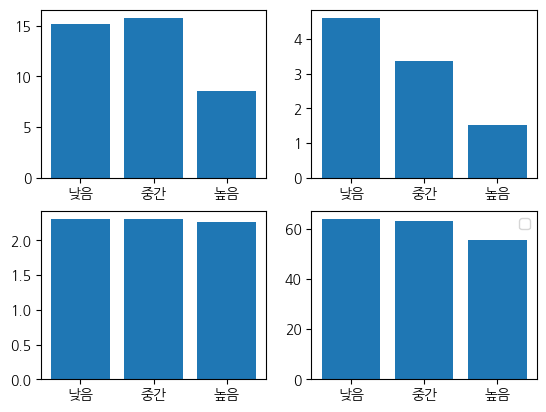

In [ ]:
plt.figure(figsize=(20,10))
plt.subplots(2,2)

plt.subplot(2,2,1)
plt.bar(grp_df.index, grp_df['평균기온(°C)'])

plt.subplot(2, 2, 2)
plt.bar(grp_df.index, grp_df['일강수량(mm)'])


plt.subplot(2, 2, 3)
plt.bar(grp_df.index, grp_df['평균 풍속(m/s)'])


plt.subplot(2, 2, 4)
plt.bar(grp_df.index, grp_df['평균 상대습도(%)'])

plt.legend()
plt.show()

In [ ]:
sum_df['년도'] = sum_df['날짜'].dt.year

In [ ]:
year_df = sum_df[['년도','천식','눈병','피부병']].groupby(['년도']).mean()
year_df.head()

,천식,눈병,피부병
년도,,,
2014,5711.736986,6540.556164,9012.742466
2015,5026.263014,6463.742466,8747.049315
2016,5067.338798,7013.546448,8914.169399
2017,4502.898630,7026.621918,8953.769863
2018,4327.082192,7168.621918,8873.717808


/tmp/ipython-input-682679811.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


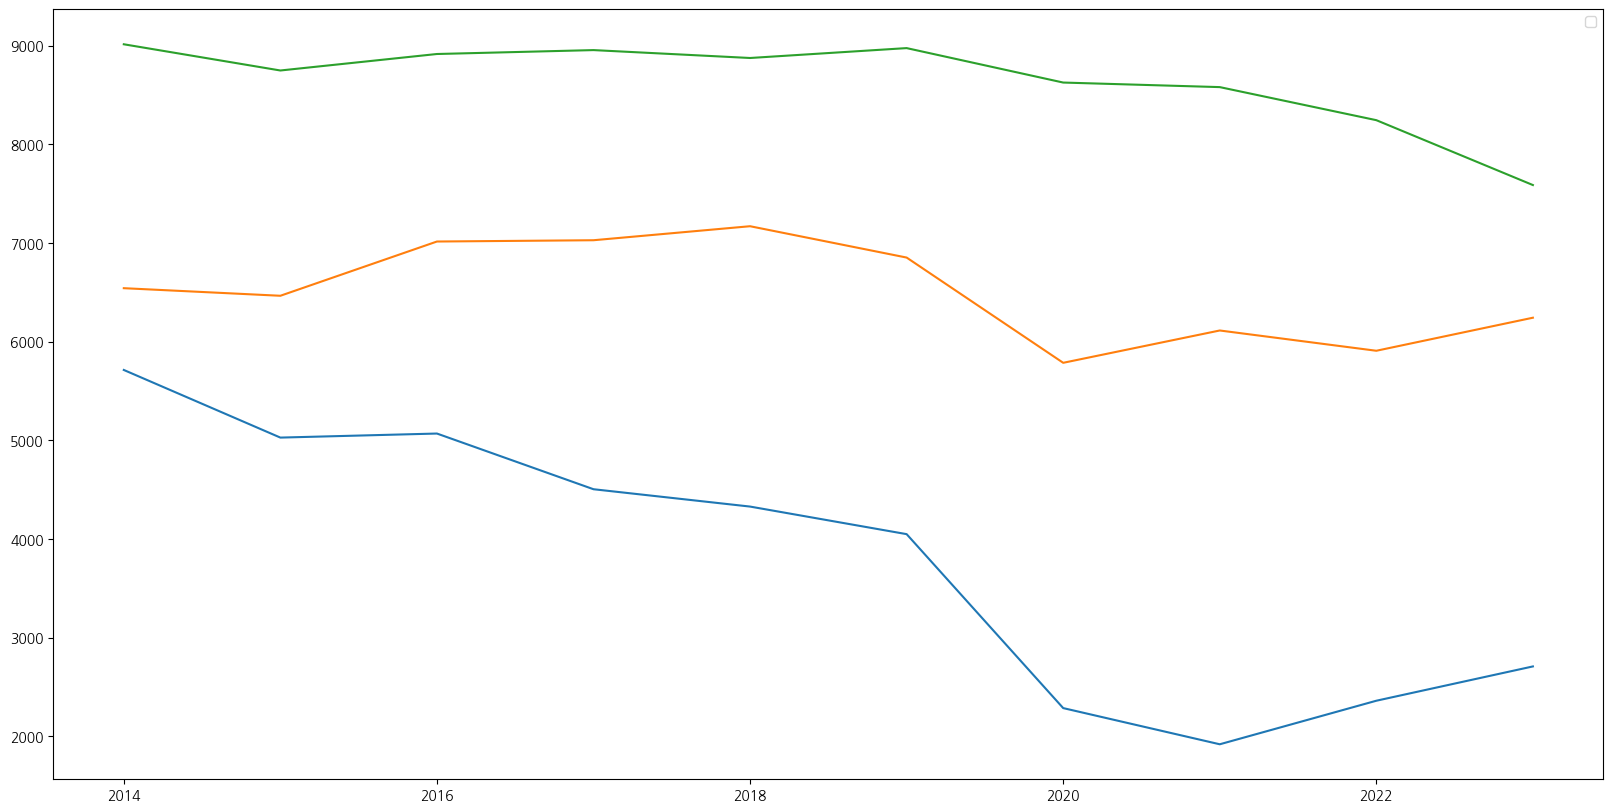

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot()
plt.plot(year_df.index, year_df['천식'])
plt.plot(year_df.index, year_df['눈병'])
plt.plot(year_df.index, year_df['피부병'])



plt.legend()
plt.show()

In [ ]:
df_2022 = sum_df[sum_df['날짜'].dt.year == 2022]

In [ ]:
df_2022_m = df_2022[['날짜','감기','일강수량(mm)']].groupby(df_2022['날짜'].dt.month).mean()

In [ ]:
df_2022_m

,날짜,감기,일강수량(mm)
날짜,,,
1,2022-01-16 00:00:00,37828.064516,0.177419
2,2022-02-14 12:00:00,48962.500000,0.167857
3,2022-03-16 00:00:00,66123.193548,3.309677
4,2022-04-15 12:00:00,56502.366667,0.680000
5,2022-05-16 00:00:00,44780.419355,0.241935
6,2022-06-15 12:00:00,39421.400000,13.126667
7,2022-07-16 00:00:00,45401.870968,8.138710
8,2022-08-16 00:00:00,42913.258065,18.219355
9,2022-09-15 12:00:00,50379.433333,6.716667


/tmp/ipython-input-1090385764.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


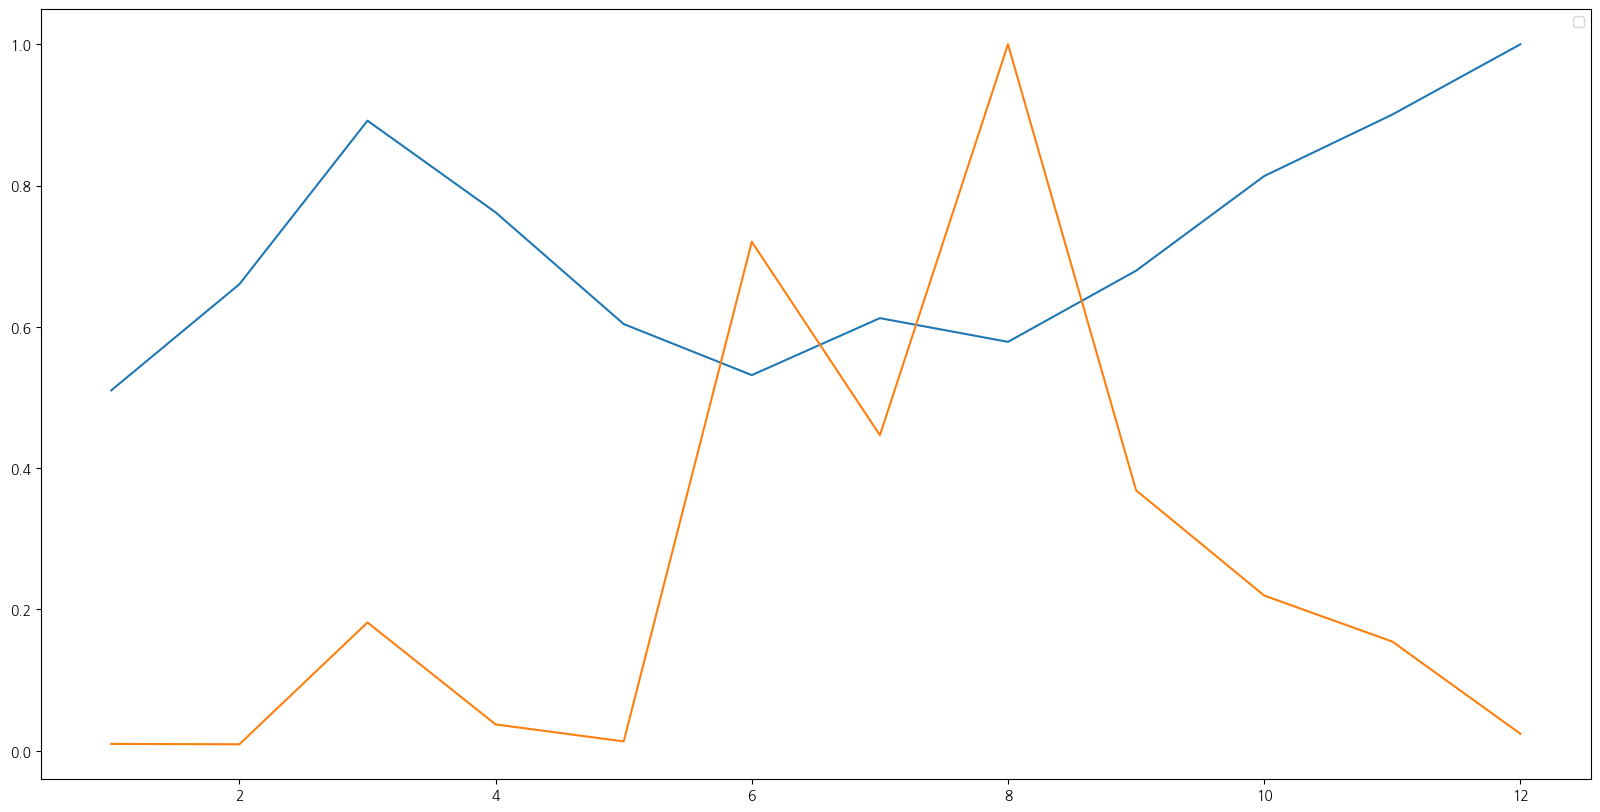

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot()

plt.plot(df_2022_m.index, df_2022_m['감기'].apply(lambda x: x / df_2022_m['감기'].max()))
plt.plot(df_2022_m.index, df_2022_m['일강수량(mm)'].apply(lambda x: x / df_2022_m['일강수량(mm)'].max()))

plt.legend()
plt.show()

#### [실습 4-2]

의약품성분_주의항목.csv 파일에서 다음 작업 진행

1. '주의항목' 컬럼에 문자열 형식으로 나누어진 카테고리를 '주의항목1','주의항목2','주의항목3' 컬럼으로 분리한 데이터프레임 출력
2. 1번 결과를 활용하여 '주의항목'에 존재하는 카테고리의 고유항목을 출력
    * 공백이 포함된경우 공백을 제거하여 카테고리를 통일 시킬것
3. 의약품성분_주의항목의 '단위'를 다음 규칙으로 전처리
    * 띄어쓰기가 있는경우 띄어쓰기 앞쪽 단어만 유지
    * () 표현이 들어간 경우 ( 앞의 단어만 유지
    * / 표현이 들어간 경우 / 앞의 단어만 유지
4. [심화] 3번 결과 전처리된 단위에서 다음 규칙을 적용해 '단위'와 '함량'을 수정, 규칙에 없는 단위는 기존 데이터를 그대로 사용(apply 활용)
    * 단위가 g 인 경우 함량에 1000을 곱하고 단위를 mg 으로 변환
    * 단위가 μg 인 경우 함량에 1000을 나누고 단위를 mg 으로 변환
    * 단위가 μL 인 경우 함량에 1000을 나누고 단위를 ml 으로 변환
    * 단위가 GBq 인 경우 함량에 1000을 곱하고 단위를 MBq 으로 변환

In [ ]:
import pandas as pd

dg_df = pd.read_csv('/content/실습데이터/의약품성분_주의항목.csv')

In [ ]:
dg_df.head()

,일반명코드,제형구분코드,제형,분류번호,투여경로,함량,단위,주의항목
0,100301ACH,CH,경질캡슐제,236,내복,0.250,g,['임산부금기']
1,100501ATE,TE,장용정제,119,내복,0.333,g,"['연령금기', '임산부금기']"
2,100601ATB,TB,"정제,저작정",396,내복,0.100,g,"['연령금기', '임산부금기']"
3,100602ATB,TB,"정제,저작정",396,내복,50.000,mg,"['연령금기', '임산부금기']"
4,100901ACH,CH,경질캡슐제,114,내복,0.100,g,['임산부금기']


In [ ]:
cat = ['노인주의', '연령금기', '임산부금기']

for i in cat:
    dg_df[i] = dg_df['주의항목'].apply(lambda x: 1 if i in x else 0)

inco_df = dg_df.drop('주의항목', axis=1)
inco_df.head()

,일반명코드,제형구분코드,제형,분류번호,투여경로,함량,단위,노인주의,연령금기,임산부금기
0,100301ACH,CH,경질캡슐제,236,내복,0.250,g,0,0,1
1,100501ATE,TE,장용정제,119,내복,0.333,g,0,1,1
2,100601ATB,TB,"정제,저작정",396,내복,0.100,g,0,1,1
3,100602ATB,TB,"정제,저작정",396,내복,50.000,mg,0,1,1
4,100901ACH,CH,경질캡슐제,114,내복,0.100,g,0,0,1


In [ ]:
inco_df['단위'].unique()

array(['g', 'mg', 'MI.U', '㎍', 'mg(0.5mg/mL)', 'μg(5μg/mL)',
       'g(0.4mg/mL)', 'g(0.125g/mL)', 'g(0.25g/mL)', 'g(0.1g/mL)',
       'g(25mg/mL)', 'g(50mg/mL)', 'mg(5mg/mL)', 'mg(10mg/mL)',
       'g(10mg/mL)', 'mg(2.39mg/mL)', 'mg(1.25mg/mL)', 'g(0.99g/g)', 'μg',
       'mg(4mg/mL)', 'mg(0.3333mg/mL)', 'mg(1.5mg/mL)', 'mg(0.25mg/mL)',
       'mg(2.5mg/mL)', 'g(5mg/mL)', 'mg for 168h', 'mg for 96h',
       'mg for 72h', 'mg(6mg/mL)', 'mg(1mg/mL)', 'mg(2mg/mL)',
       'μg(1μg/mL)', 'g(20mg/mL)', 'g(as silymarin 70mg)',
       'g(as silymarin 0.14g)', 'g(1mg/mL)', 'g(2mg/mL)', 'g(0.15g/mL)',
       'g(20mg/g)', 'g(10mg/g)', 'mg(0.5mg/g)', 'mg(0.466mg/mL)',
       'g(0.5mg/g)', 'g(0.1g/g)', 'mL(1mL/mL)', 'mg(0.5mg/g(mL))',
       'mg(2.5mg/g(mL))', 'mg(2.5mg/g)', 'g(2.5mg/g)', 'mg(4.37mg/mL)',
       'g(12mg/mL)', 'mg(12mg/mL)', 'mg(25mg/mL)', 'mg(37.5mg/mL)',
       'mg(30mg/mL)', 'mg(45mg/mL)', 'mg(3mg/g)', 'g(3mg/g)',
       'g(150mg/mL)', 'g(0.2g/mL)', 'mg(20mg/mL)', 'mg(40mg/mL)',

In [ ]:
co_inco_df = inco_df.copy()
co_inco_df['단위'] = inco_df['단위'].str.split(' ').str[0]
co_inco_df['단위'] = co_inco_df['단위'].str.split('(').str[0]
co_inco_df['단위'] = co_inco_df['단위'].str.split('/').str[0]

In [ ]:
co_inco_df['단위'].unique()

array(['g', 'mg', 'MI.U', '㎍', 'μg', 'mL', 'I.U', 'KI.U', 'Kyowa', '만I.U',
       'Vasopressin', 'GBq', '', 'MBq', 'unit', 'μCi', 'CFU', '억~50억마리',
       ',500만개', 'mCi', 'PFU이상', 'PFU', 'logCCID50이상', 'TCID50이상',
       'LD50이상', 'I.u', '분류되지', 'KU', 'AU', 'KAU', 'μL', '~2960MBq', '개',
       'IU'], dtype=object)

In [ ]:
path = {}
for i in co_inco_df['단위']:
    index = co_inco_df[co_inco_df['단위'] == i].index.to_series()
    if i == 'g':
        co_inco_df.loc[index, '단위'] = 'mg'
        co_inco_df.loc[index, '함량'] = co_inco_df.loc[index, '함량'] * 1000
        path[str(index)] = f"단위 {i} 에서 'mg'"
    elif i in ['μg', '㎍']:
        co_inco_df.loc[index, '단위'] = 'mg'
        co_inco_df.loc[index, '함량'] = co_inco_df.loc[index, '함량'] / 1000
        path[str(index)] = f"단위 {i} 에서 'mg'"
    elif i == 'μL':
        co_inco_df.loc[index, '단위'] = 'ml'
        co_inco_df.loc[index, '함량'] = co_inco_df.loc[index, '함량'] / 1000
        path[str(index)] = f"단위 {i} 에서 'ml'"
    elif i == 'GBq':
        co_inco_df.loc[index, '단위'] = 'MBq'
        co_inco_df.loc[index, '함량'] = co_inco_df.loc[index, '함량'] * 1000
        path[str(index)] = f"단위 {i} 에서 'MBq'"
    elif i == 'mL':
        co_inco_df.loc[index, '단위'] = 'ml'
        path[str(index)] = f"단위 {i} 에서 'ml'"



In [ ]:
co_inco_df['단위'].unique()

array(['mg', 'MI.U', 'ml', 'I.U', 'KI.U', 'Kyowa', '만I.U', 'Vasopressin',
       'MBq', '', 'unit', 'μCi', 'CFU', '억~50억마리', ',500만개', 'mCi',
       'PFU이상', 'PFU', 'logCCID50이상', 'TCID50이상', 'LD50이상', 'I.u', '분류되지',
       'KU', 'AU', 'KAU', '~2960MBq', '개', 'IU'], dtype=object)

In [ ]:
for i in co_inco_df['단위']:
    index = co_inco_df[co_inco_df['단위'] == i].index.to_series()

    if i == 'KI.U':
        co_inco_df.loc[index, '단위'] = 'I.U'
        co_inco_df.loc[index, '함량'] = co_inco_df.loc[index, '함량'] * 1000

    elif i == 'KAU':
        co_inco_df.loc[index, '단위'] = 'AU'
        co_inco_df.loc[index, '함량'] = co_inco_df.loc[index, '함량'] / 1000

    elif i == '만I.U':
        co_inco_df.loc[index, '단위'] = 'I.U'
        co_inco_df.loc[index, '함량'] = co_inco_df.loc[index, '함량'] * 10000

    elif i == 'GBq':
        co_inco_df.loc[index, '단위'] = 'MBq'
        co_inco_df.loc[index, '함량'] = co_inco_df.loc[index, '함량'] * 1000

    elif i in ['I.u' , 'IU']:
        co_inco_df.loc[index, '단위'] = 'I.U'

In [ ]:
co_inco_df['단위'].unique()

array(['mg', 'MI.U', 'ml', 'I.U', 'Kyowa', 'Vasopressin', 'MBq', '',
       'unit', 'μCi', 'CFU', '억~50억마리', ',500만개', 'mCi', 'PFU이상', 'PFU',
       'logCCID50이상', 'TCID50이상', 'LD50이상', '분류되지', 'KU', 'AU',
       '~2960MBq', '개'], dtype=object)